In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import os

In [2]:
print(os.getcwd())

/Users/emanoelagbayani/Documents/GitHub/PredictiveHairlossAnalysis


In [3]:
df = pd.read_csv("Predict Hair Fall.csv")
df.head()

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


In [4]:
df['Medical Conditions'].unique()

array(['No Data', 'Eczema', 'Dermatosis', 'Ringworm', 'Psoriasis',
       'Alopecia Areata ', 'Scalp Infection', 'Seborrheic Dermatitis',
       'Dermatitis', 'Thyroid Problems', 'Androgenetic Alopecia'],
      dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         999 non-null    int64 
 1   Genetics                   999 non-null    object
 2   Hormonal Changes           999 non-null    object
 3   Medical Conditions         999 non-null    object
 4   Medications & Treatments   999 non-null    object
 5   Nutritional Deficiencies   999 non-null    object
 6   Stress                     999 non-null    object
 7   Age                        999 non-null    int64 
 8   Poor Hair Care Habits      999 non-null    object
 9   Environmental Factors      999 non-null    object
 10  Smoking                    999 non-null    object
 11  Weight Loss                999 non-null    object
 12  Hair Loss                  999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB


In [6]:
df.describe()

,Id,Age,Hair Loss
count,999.000000,999.000000,999.000000
mean,153354.673674,34.188188,0.497497
std,25516.041985,9.377980,0.500244
min,110003.000000,18.000000,0.000000
25%,131867.500000,26.000000,0.000000
50%,152951.000000,34.000000,0.000000
75%,174969.000000,42.000000,1.000000
max,199949.000000,50.000000,1.000000


In [7]:
df.isnull().sum()

Id                           0
Genetics                     0
Hormonal Changes             0
Medical Conditions           0
Medications & Treatments     0
Nutritional Deficiencies     0
Stress                       0
Age                          0
Poor Hair Care Habits        0
Environmental Factors        0
Smoking                      0
Weight Loss                  0
Hair Loss                    0
dtype: int64

In [8]:
#Basic EDA

<AxesSubplot:xlabel='Age', ylabel='Count'>

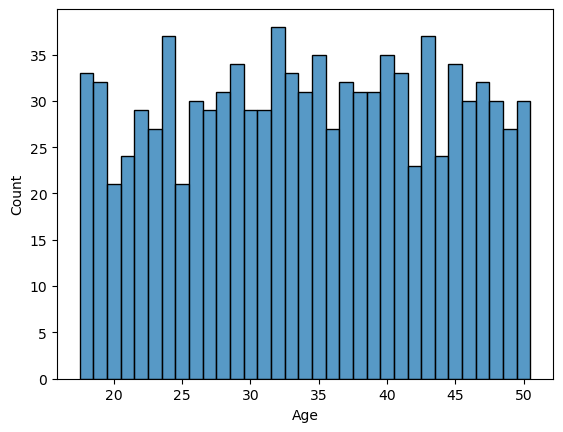

In [9]:
sns.histplot(data=df, x=df['Age'],discrete=True)
#shows how the ages and a count of each age

<AxesSubplot:xlabel='Count', ylabel='Medical Conditions'>

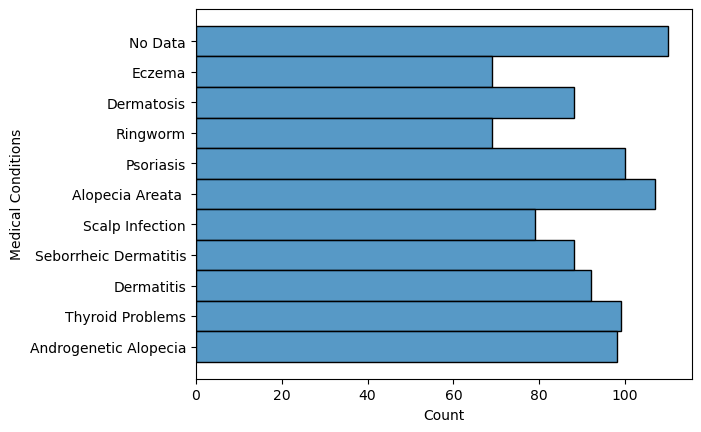

In [10]:
sns.histplot(data=df, y='Medical Conditions')
#shows us the count of each medication condition

<AxesSubplot:xlabel='Count', ylabel='Stress'>

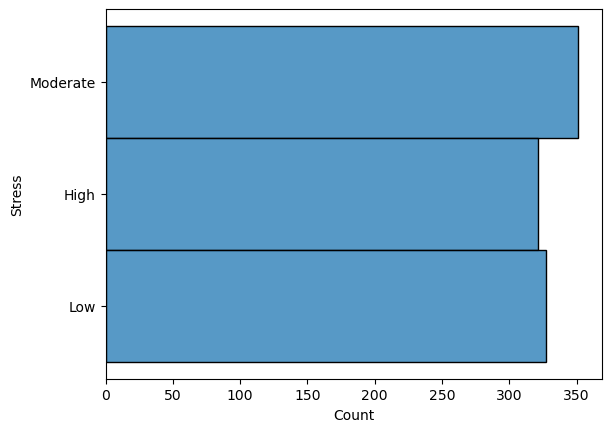

In [11]:
sns.histplot(data=df, y='Stress')
#shows us the moderate levels of stress

In [12]:
df.columns

Index(['Id', 'Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies ', 'Stress',
       'Age', 'Poor Hair Care Habits ', 'Environmental Factors', 'Smoking',
       'Weight Loss ', 'Hair Loss'],
      dtype='object')

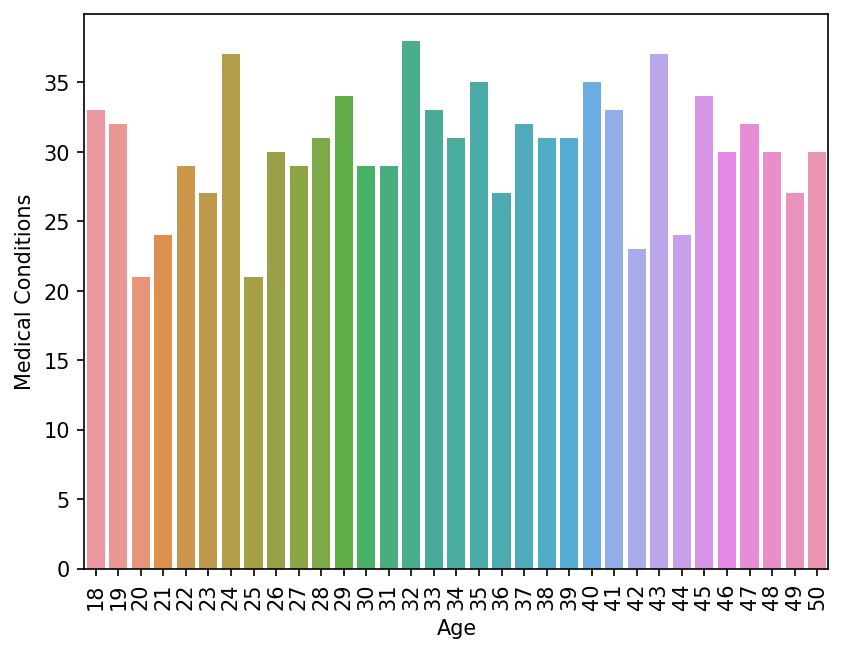

In [13]:
medical_conditions_count = df.groupby('Age')['Medical Conditions'].count().reset_index(name='Medical Conditions')

plt.figure(dpi=150)
sns.barplot(data = medical_conditions_count,
            x='Age',y='Medical Conditions')
plt.xticks(rotation=90);

In [14]:
df[df['Age']==18]['Medical Conditions'].value_counts()

No Data                  15
Alopecia Areata           3
Dermatitis                3
Ringworm                  3
Psoriasis                 2
Thyroid Problems          2
Seborrheic Dermatitis     2
Scalp Infection           2
Eczema                    1
Name: Medical Conditions, dtype: int64

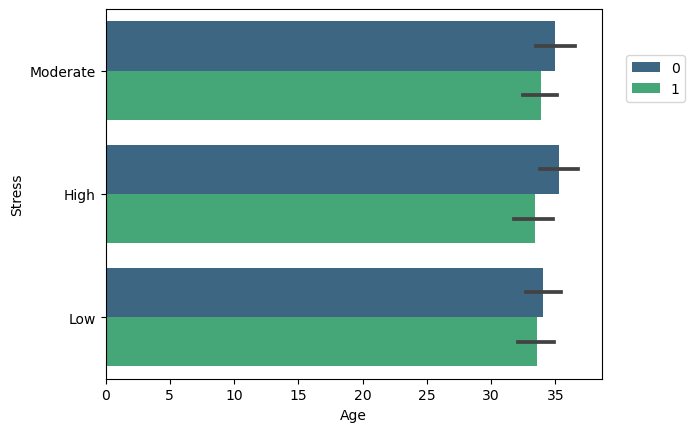

In [15]:
sns.barplot(data=df,x='Age',y='Stress',hue='Hair Loss',
           palette='viridis')
plt.legend(loc=(1.05,.75))

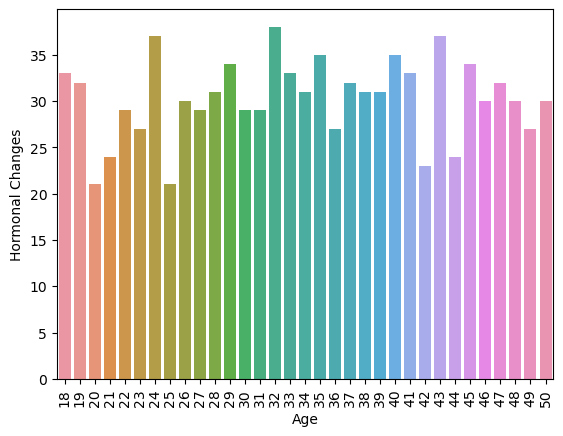

In [16]:
hormonal_changes_count = df.groupby('Age')['Hormonal Changes'].count().reset_index(name='Hormonal Changes')
sns.barplot(data=hormonal_changes_count, x='Age', y='Hormonal Changes')
plt.xticks(rotation=90);
#there is a surprising amount of hormonal changes for 

In [17]:
df['Medical Conditions'].unique()

array(['No Data', 'Eczema', 'Dermatosis', 'Ringworm', 'Psoriasis',
       'Alopecia Areata ', 'Scalp Infection', 'Seborrheic Dermatitis',
       'Dermatitis', 'Thyroid Problems', 'Androgenetic Alopecia'],
      dtype=object)

In [18]:
df.isna().sum() > 0

Id                           False
Genetics                     False
Hormonal Changes             False
Medical Conditions           False
Medications & Treatments     False
Nutritional Deficiencies     False
Stress                       False
Age                          False
Poor Hair Care Habits        False
Environmental Factors        False
Smoking                      False
Weight Loss                  False
Hair Loss                    False
dtype: bool

In [19]:
#so we have no null values in the whole data frame, but we do have both categoricial and numeric data, we will need to get dummy variables
df.columns
df['Smoking'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
df['Age'].sort_values().unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [21]:
list(df.columns)

['Id',
 'Genetics',
 'Hormonal Changes',
 'Medical Conditions',
 'Medications & Treatments',
 'Nutritional Deficiencies ',
 'Stress',
 'Age',
 'Poor Hair Care Habits ',
 'Environmental Factors',
 'Smoking',
 'Weight Loss ',
 'Hair Loss']

In [22]:
#separating the df columns into categorical and numeric
my_object_df = df.select_dtypes(include='object')
my_numeric_df = df.select_dtypes(exclude='object')

In [23]:
my_object_df

,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss
0,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,Yes,Yes,No,No
1,No,No,Eczema,Antibiotics,Magnesium deficiency,High,Yes,Yes,No,No
2,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,Yes,Yes,No,Yes
3,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,Yes,Yes,No,No
4,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,No,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...
994,Yes,No,Seborrheic Dermatitis,Rogaine,Vitamin A Deficiency,Low,Yes,Yes,Yes,Yes
995,Yes,Yes,No Data,Accutane,Protein deficiency,Low,No,No,No,Yes
996,No,Yes,Androgenetic Alopecia,Antidepressants,Protein deficiency,Moderate,Yes,No,Yes,Yes
997,No,Yes,Dermatitis,Immunomodulators,Biotin Deficiency,Moderate,Yes,Yes,Yes,Yes


In [24]:
my_numeric_df

,Id,Age,Hair Loss
0,133992,19,0
1,148393,43,0
2,155074,26,0
3,118261,46,0
4,111915,30,1
...,...,...,...
994,184367,33,1
995,164777,47,0
996,143273,20,1
997,169123,32,1


In [25]:
#getting dummy variables from the categorical column
df_objects_dummies = pd.get_dummies(my_object_df, drop_first=True)
df_objects_dummies.head()

,Genetics_Yes,Hormonal Changes_Yes,Medical Conditions_Androgenetic Alopecia,Medical Conditions_Dermatitis,Medical Conditions_Dermatosis,Medical Conditions_Eczema,Medical Conditions_No Data,Medical Conditions_Psoriasis,Medical Conditions_Ringworm,Medical Conditions_Scalp Infection,...,Nutritional Deficiencies _Vitamin A Deficiency,Nutritional Deficiencies _Vitamin D Deficiency,Nutritional Deficiencies _Vitamin E deficiency,Nutritional Deficiencies _Zinc Deficiency,Stress_Low,Stress_Moderate,Poor Hair Care Habits _Yes,Environmental Factors_Yes,Smoking_Yes,Weight Loss _Yes
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,1
3,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,1,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0


In [26]:
#b/c we are predicting a category with label'd data

In [27]:
final_df = pd.concat([my_numeric_df,df_objects_dummies], axis=1)
final_df

,Id,Age,Hair Loss,Genetics_Yes,Hormonal Changes_Yes,Medical Conditions_Androgenetic Alopecia,Medical Conditions_Dermatitis,Medical Conditions_Dermatosis,Medical Conditions_Eczema,Medical Conditions_No Data,...,Nutritional Deficiencies _Vitamin A Deficiency,Nutritional Deficiencies _Vitamin D Deficiency,Nutritional Deficiencies _Vitamin E deficiency,Nutritional Deficiencies _Zinc Deficiency,Stress_Low,Stress_Moderate,Poor Hair Care Habits _Yes,Environmental Factors_Yes,Smoking_Yes,Weight Loss _Yes
0,133992,19,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,1,1,0,0
1,148393,43,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
2,155074,26,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,1,0,1
3,118261,46,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
4,111915,30,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,184367,33,1,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,1,1,1
995,164777,47,0,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
996,143273,20,1,0,1,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1
997,169123,32,1,0,1,0,1,0,0,0,...,0,0,0,0,0,1,1,1,1,1


In [28]:
#but first lets train test split and validate our machine 
final_df = final_df.drop('Id', axis=1)
final_df

,Age,Hair Loss,Genetics_Yes,Hormonal Changes_Yes,Medical Conditions_Androgenetic Alopecia,Medical Conditions_Dermatitis,Medical Conditions_Dermatosis,Medical Conditions_Eczema,Medical Conditions_No Data,Medical Conditions_Psoriasis,...,Nutritional Deficiencies _Vitamin A Deficiency,Nutritional Deficiencies _Vitamin D Deficiency,Nutritional Deficiencies _Vitamin E deficiency,Nutritional Deficiencies _Zinc Deficiency,Stress_Low,Stress_Moderate,Poor Hair Care Habits _Yes,Environmental Factors_Yes,Smoking_Yes,Weight Loss _Yes
0,19,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,1,0,0
1,43,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
2,26,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,1,0,1
3,46,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
4,30,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,33,1,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,1,1,1
995,47,0,1,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
996,20,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1
997,32,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1


In [29]:
X = final_df.drop('Hair Loss',axis =1)
y = final_df['Hair Loss']

In [30]:
X.head()

,Age,Genetics_Yes,Hormonal Changes_Yes,Medical Conditions_Androgenetic Alopecia,Medical Conditions_Dermatitis,Medical Conditions_Dermatosis,Medical Conditions_Eczema,Medical Conditions_No Data,Medical Conditions_Psoriasis,Medical Conditions_Ringworm,...,Nutritional Deficiencies _Vitamin A Deficiency,Nutritional Deficiencies _Vitamin D Deficiency,Nutritional Deficiencies _Vitamin E deficiency,Nutritional Deficiencies _Zinc Deficiency,Stress_Low,Stress_Moderate,Poor Hair Care Habits _Yes,Environmental Factors_Yes,Smoking_Yes,Weight Loss _Yes
0,19,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,1,0,0
1,43,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,26,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,1,0,1
3,46,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,1,0,0
4,30,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
#train_test_split
#grab the tuple unpacking and because we are testing and validating our data will be in a 70 15 15, with seed/state of 101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [33]:
X_validation, X_holdout_test, y_validation, y_holdout_test = train_test_split(X_test, y_test, test_size=0.5, random_state=101)

In [34]:
#to make sure everything is right, we can check the size of everything
len(df)

999

In [35]:
len(X_train)

699

In [36]:
len(X_validation)

150

In [37]:
len(X_holdout_test)

150

In [38]:
#we can see everything adds up to 999 (length of original df) and if not we did something wrong

In [39]:
#just to make sure, we will scale our data as well
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
scaled_X_holdout_test = scaler.transform(X_holdout_test)
scaled_X_validation = scaler.fit_transform(X_validation)

In [41]:
from sklearn.svm import SVC

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
svc_model = SVC(random_state=101)

In [44]:
kernel = ['linear', 'poly', 'rbf','sigmoid']

In [45]:
gamma = [0.001, 0.01, 0.1, 1, 10]

In [46]:
C = [0.01, 0.1, 1, 10, 100]

In [47]:
param_grid = {'kernel': kernel,
              'C': C,
             'gamma': gamma}

In [48]:
svc_grid_model = GridSearchCV(svc_model,param_grid=param_grid)

In [49]:
svc_grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(random_state=101),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [50]:
best_svc_model = svc_grid_model.best_params_
best_svc_model

{'C': 0.1, 'gamma': 10, 'kernel': 'sigmoid'}

In [51]:
best_svc_model = SVC(random_state=101,C=0.1,gamma=10, kernel='sigmoid')

In [52]:
best_svc_model.fit(scaled_X_train,y_train)

SVC(C=0.1, gamma=10, kernel='sigmoid', random_state=101)

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [54]:
#we will begin with validation
svc_validation_predictions = best_svc_model.predict(scaled_X_validation)
#validation_predictions

In [55]:
svc_validate_mae = mean_absolute_error(y_validation, svc_validation_predictions) #compare to mean value
svc_validate_mae

0.5

In [56]:
svc_validate_rmse = mean_squared_error(y_validation, svc_validation_predictions) ** 0.5 #RMSE #compare to STD
svc_validate_rmse

0.7071067811865476

In [57]:
#as a baseline we have MAE: 0.4 and RMSE =0.63
#now we will being using testing
svc_holdout_predictions = best_svc_model.predict(scaled_X_holdout_test)

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [59]:
accuracy_score(y_holdout_test, svc_holdout_predictions)
#initial accuracy score for holdout

0.49333333333333335

In [60]:
svc_holdout_mae = mean_absolute_error(y_holdout_test, svc_holdout_predictions) 
svc_holdout_mae

0.5066666666666667

In [61]:
svc_holdout_rmse = mean_squared_error(y_holdout_test, svc_holdout_predictions) ** 0.5 
svc_holdout_rmse

0.7118052168020874

In [62]:
svc_y_final_pred = best_svc_model.predict(scaled_X_test)
#svc_y_final_pred

In [63]:
accuracy_score(y_test,svc_y_final_pred)

0.49333333333333335

In [64]:
print(classification_report(y_test,svc_y_final_pred))

              precision    recall  f1-score   support

           0       0.50      0.54      0.52       151
           1       0.49      0.44      0.46       149

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.49      0.49      0.49       300



In [65]:
svc_report = classification_report(y_test,svc_y_final_pred,output_dict=True)
svc_report

{'0': {'precision': 0.49696969696969695,
  'recall': 0.543046357615894,
  'f1-score': 0.5189873417721519,
  'support': 151},
 '1': {'precision': 0.4888888888888889,
  'recall': 0.4429530201342282,
  'f1-score': 0.4647887323943662,
  'support': 149},
 'accuracy': 0.49333333333333335,
 'macro avg': {'precision': 0.4929292929292929,
  'recall': 0.4929996888750611,
  'f1-score': 0.491888037083259,
  'support': 300},
 'weighted avg': {'precision': 0.492956228956229,
  'recall': 0.49333333333333335,
  'f1-score': 0.49206869911451834,
  'support': 300}}

In [66]:
#that's with svc, lets see how it compares to logistic regression 

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
log_model = LogisticRegression()

In [69]:
penalty = ['l1','l2','elasticnet']

In [70]:
C = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]

In [71]:
max_iter = [100,500,1000, 1500, 2500, 3000]

In [72]:
param_grid = {'penalty': penalty,
              'C' : C,
              'max_iter': max_iter}

In [73]:
lr_grid_model = GridSearchCV(log_model,param_grid=param_grid)

In [74]:
lr_grid_model.fit(scaled_X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
540 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
V

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100],
                         'max_iter': [100, 500, 1000, 1500, 2500, 3000],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [75]:
lr_grid_model.best_params_

{'C': 0.001, 'max_iter': 100, 'penalty': 'l2'}

In [76]:
best_lr_model = LogisticRegression(C=0.001, max_iter=100, penalty='l2')
best_lr_model

LogisticRegression(C=0.001)

In [77]:
best_lr_model.fit(scaled_X_train,y_train)

LogisticRegression(C=0.001)

In [78]:
lr_validation_predictions = best_lr_model.predict(scaled_X_validation)

In [79]:
lr_validate_mae = mean_absolute_error(y_validation, lr_validation_predictions) #compare to mean value
lr_validate_mae

0.4866666666666667

In [80]:
lr_validate_rmse = mean_squared_error(y_validation, lr_validation_predictions) ** 0.5 
lr_validate_rmse

0.697614984548545

In [81]:
#since we have a baseline of mae=0.5 and rmse=0.7, let's compare it to the holdout test
lr_holdout_predictions = best_lr_model.predict(scaled_X_holdout_test)

In [82]:
accuracy_score(y_holdout_test,lr_holdout_predictions)

0.47333333333333333

In [83]:
lr_holdout_mae = mean_absolute_error(y_holdout_test, lr_holdout_predictions)
lr_holdout_mae

0.5266666666666666

In [84]:
lr_holdout_rmse = mean_squared_error(y_holdout_test, lr_holdout_predictions) **0.5
lr_holdout_rmse

0.725718035235908

In [85]:
lr_y_final_pred = best_svc_model.predict(scaled_X_test)

In [86]:
accuracy_score(y_test, lr_y_final_pred)

0.49333333333333335

In [87]:
print(classification_report(y_test,lr_y_final_pred))

              precision    recall  f1-score   support

           0       0.50      0.54      0.52       151
           1       0.49      0.44      0.46       149

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.49      0.49      0.49       300



In [88]:
lr_report = classification_report(y_test,lr_y_final_pred,output_dict=True)

In [89]:
#now lets try a random forest
from sklearn.ensemble import RandomForestClassifier

In [90]:
rfc_model = RandomForestClassifier()

In [91]:
n_estimators = [100, 200, 500, 1000, 1500, 2000, 2500]

In [92]:
max_features = ['sqrt', 'log2', None, 2, 5, 10]

In [93]:
bootstrap = [True, False]

In [94]:
oob_score = [True, False]

In [95]:
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'bootstrap': bootstrap,
              'oob_score': oob_score}

In [96]:
rfc_grid_model = GridSearchCV(rfc_model, param_grid)

In [ ]:
rfc_grid_model.fit(scaled_X_train,y_train)

In [ ]:
best_rfc_model = rfc_grid_model.best_params_
best_rfc_model

In [ ]:
best_rfc_model = RandomForestClassifier(bootstrap=False ,max_features=None,
                                        n_estimators=1000, oob_score=False)

In [ ]:
best_rfc_model.fit(scaled_X_train,y_train)

In [ ]:
rfc_validation_predictions = best_rfc_model.predict(scaled_X_validation)

In [ ]:
#gathering baseline stats to compare to holdout test stats
rfc_validate_mae = mean_absolute_error(y_validation, rfc_validation_predictions)
rfc_validate_mae

In [ ]:
rfc_validate_rmse = mean_squared_error(y_validation, rfc_validation_predictions) **0.5
rfc_validate_rmse

In [ ]:
rfc_holdout_predictions = best_rfc_model.predict(scaled_X_holdout_test)

In [ ]:
accuracy_score(y_holdout_test, rfc_holdout_predictions)

In [ ]:
rfc_holdout_mae = mean_absolute_error(y_holdout_test, rfc_validation_predictions)
rfc_holdout_mae

In [ ]:
rfc_holdout_rmse = mean_squared_error(y_holdout_test, rfc_validation_predictions) **0.5
rfc_holdout_rmse

In [ ]:
rfc_y_final_pred = best_rfc_model.predict(scaled_X_test)

In [ ]:
accuracy_score(y_test,rfc_y_final_pred)

In [ ]:
print(classification_report(y_test,rfc_y_final_pred))

In [ ]:
rfc_report = classification_report(y_test,rfc_y_final_pred,output_dict=True)

In [ ]:
from sklearn.naive_bayes import CategoricalNB, BernoulliNB

In [ ]:
nb_model = BernoulliNB()

In [ ]:
alpha = [0.001,0.01, 0.1,0.2,0.5,0.7,1,2,5,10]

In [ ]:
fit_prior = [True, False]

In [ ]:
binarize = [None, 0.0, 0.5, 1.0]

In [ ]:
param_grid = {'alpha': alpha,
             'fit_prior': fit_prior,
             'binarize': binarize}

In [ ]:
nb_grid_model = GridSearchCV(nb_model, param_grid)

In [ ]:
nb_grid_model.fit(scaled_X_train,y_train)

In [ ]:
best_nb_model = nb_grid_model.best_params_
best_nb_model

In [ ]:
best_nb_model = BernoulliNB(alpha = 0.001, binarize=None,fit_prior = True)

In [ ]:
best_nb_model = nb_grid_model.fit(scaled_X_train,y_train)

In [ ]:
nb_validation_predictions = best_nb_model.predict(X_validation)
nb_validation_predictions

In [ ]:
nb_validate_mae = mean_absolute_error(y_validation, nb_validation_predictions)
nb_validate_mae

In [ ]:
nb_validate_rmse = mean_squared_error(y_validation, nb_validation_predictions) ** 0.5
nb_validate_rmse

In [ ]:
nb_holdout_predictions = best_nb_model.predict(scaled_X_holdout_test)

In [ ]:
accuracy_score(y_holdout_test, nb_holdout_predictions)

In [ ]:
svc_holdout_mae = mean_absolute_error(y_holdout_test, nb_holdout_predictions)
svc_holdout_mae

In [ ]:
nb_holdout_rmse = mean_squared_error(y_holdout_test, nb_holdout_predictions) ** 0.5
nb_holdout_rmse

In [ ]:
nb_y_final_pred = best_nb_model.predict(scaled_X_test)

In [ ]:
accuracy_score(y_test, nb_y_final_pred)

In [ ]:
print(classification_report(y_test,nb_y_final_pred))

In [ ]:
nb_report = classification_report(y_test,nb_y_final_pred,output_dict=True)

In [ ]:
#let's try gradient and adaboosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
param_grid = {'n_estimators' : [50,100,500,1000,1500,2000],
             'learning_rate' : [0.01, 0.05, 0.1],
             'max_depth' : [3,4,5,10]}

In [ ]:
gb_model = GradientBoostingClassifier()

In [ ]:
gb_grid_model = GridSearchCV(gb_model, param_grid)

In [ ]:
gb_grid_model.fit(scaled_X_train,y_train)

In [ ]:
best_gb_model = gb_grid_model.best_params_
best_gb_model

In [ ]:
best_gb_model = GradientBoostingClassifier(learning_rate=0.05,
                                          max_depth=5,n_estimators=2000)

In [ ]:
best_gb_model

In [ ]:
best_gb_model.fit(scaled_X_train,y_train)

In [ ]:
gb_validation_predictions = best_gb_model.predict(X_validation)


In [ ]:
gb_validate_mae = mean_absolute_error(y_validation, gb_validation_predictions)
gb_validate_mae

In [ ]:
gb_validate_rmse = mean_squared_error(y_validation, gb_validation_predictions) ** 0.5
gb_validate_rmse

In [ ]:
gb_holdout_predictions = best_gb_model.predict(scaled_X_holdout_test)

In [ ]:
accuracy_score(y_holdout_test, gb_holdout_predictions)

In [ ]:
gb_holdout_mae = mean_absolute_error(y_holdout_test, gb_holdout_predictions)
gb_holdout_mae

In [ ]:
gb_holdout_rmse = mean_squared_error(y_holdout_test, gb_holdout_predictions) ** 0.5
gb_holdout_rmse

In [ ]:
gb_y_final_pred = best_gb_model.predict(scaled_X_test)

In [ ]:
accuracy_score(y_test,gb_y_final_pred)

In [ ]:
print(classification_report(y_test,gb_y_final_pred)

In [ ]:
gb_report = classification_report(y_test,gb_y_final_pred,output_dict=True)

In [ ]:
#How to choose the best model? 
#Precision for false positives
#recall for false negatives 
#highest accuracy? 
#best f1 score?

In [ ]:
def get_best_model(models_metrics_list):

    best_metrics = {
        'highest_accuracy': {'value': 0, 'model_index': None, 'model': None},
        'highest_macro_f1': {'value': 0, 'model_index': None, 'model': None},
        'highest_weighted_f1': {'value': 0, 'model_index': None, 'model': None},
        'highest_macro_precision': {'value': 0, 'model_index': None, 'model': None},
        'highest_macro_recall': {'value': 0, 'model_index': None, 'model': None}
    }

    # Iterate through the models and update the best metrics
    for index, model in enumerate(models_metrics_list):
        accuracy = model.get('accuracy', 0)
        macro_avg = model.get('macro avg', {})
        weighted_avg = model.get('weighted avg', {})

        # Update best metrics for accuracy, macro avg, and weighted avg
        if accuracy > best_metrics['highest_accuracy']['value']:
            best_metrics['highest_accuracy'] = {'value': accuracy, 'model_index': index, 'model': model}
        if macro_avg.get('f1-score', 0) > best_metrics['highest_macro_f1']['value']:
            best_metrics['highest_macro_f1'] = {'value': macro_avg.get('f1-score', 0), 'model_index': index, 'model': model}
        if weighted_avg.get('f1-score', 0) > best_metrics['highest_weighted_f1']['value']:
            best_metrics['highest_weighted_f1'] = {'value': weighted_avg.get('f1-score', 0), 'model_index': index, 'model': model}
        if macro_avg.get('precision', 0) > best_metrics['highest_macro_precision']['value']:
            best_metrics['highest_macro_precision'] = {'value': macro_avg.get('precision', 0), 'model_index': index, 'model': model}
        if macro_avg.get('recall', 0) > best_metrics['highest_macro_recall']['value']:
            best_metrics['highest_macro_recall'] = {'value': macro_avg.get('recall', 0), 'model_index': index, 'model': model}

    return best_metrics
    

In [ ]:
def get_best_model_from_list(models_metrics_list):

    best_metrics = {
        'highest_accuracy': {'value': 0, 'model_index': None, 'model': None},
        'highest_macro_f1': {'value': 0, 'model_index': None, 'model': None},
        'highest_weighted_f1': {'value': 0, 'model_index': None, 'model': None},
        'highest_macro_precision': {'value': 0, 'model_index': None, 'model': None},
        'highest_macro_recall': {'value': 0, 'model_index': None, 'model': None}
    }

    for index, model in enumerate(models_metrics_list):
        accuracy = model.get('accuracy', 0)
        macro_avg = model.get('macro avg', {})
        weighted_avg = model.get('weighted avg', {})

        if accuracy > best_metrics['highest_accuracy']['value']:
            best_metrics['highest_accuracy'] = {'value': accuracy, 'model_index': index, 'model': model}
        if macro_avg.get('f1-score', 0) > best_metrics['highest_macro_f1']['value']:
            best_metrics['highest_macro_f1'] = {'value': macro_avg.get('f1-score', 0), 'model_index': index, 'model': model}
        if weighted_avg.get('f1-score', 0) > best_metrics['highest_weighted_f1']['value']:
            best_metrics['highest_weighted_f1'] = {'value': weighted_avg.get('f1-score', 0), 'model_index': index, 'model': model}
        if macro_avg.get('precision', 0) > best_metrics['highest_macro_precision']['value']:
            best_metrics['highest_macro_precision'] = {'value': macro_avg.get('precision', 0), 'model_index': index, 'model': model}
        if macro_avg.get('recall', 0) > best_metrics['highest_macro_recall']['value']:
            best_metrics['highest_macro_recall'] = {'value': macro_avg.get('recall', 0), 'model_index': index, 'model': model}

    return best_metrics


In [ ]:
lst_reports = [svc_report,lr_report, rfc_report, nb_report, gb_report]

In [ ]:
best_metrics = get_best_model(lst_reports)

In [ ]:
for metric, result in best_metrics.items(): 
    print(f"{metric}: Value = {result['value']}, Model Index = {result['model_index']}")

In [ ]:
lst_reports[2]

In [ ]:
#Due to this, the best average model is RFC, which is random forest classifier!